# The colormap

These days, color is frequently used to encode coordinates on a third dimension for two-dimensional presentation. The encoding used to transform coordinates to colors is called a "colormap." Plots with colormaps tend to be more attention-grabbing and asthetically pleasing than plots with contours or grayscale shading. Unfortunately, certain colormaps can also misrepresent data and even lead to spurious scientific conclusions! A quick lesson on color theory can help us avoid these "bad" colormaps.

In [1]:
import proplot as plot
plot.rc.small = 10
plot.rc.large = 12

# Perceptually uniform colorspaces

For digital displays, colors are encoded as combinations of red, green, and blue (RGB), representing a three-dimensional space called a *colorspace*. It may seem obvious to build a colormap by drawing a line between two RGB coordinates. Unfortunately, human perception does not work like digital displays! For example, pure green might seem more "colorful" or more "luminant" than pure red -- so drawing a line between pure green and pure red will give you unexpected jumps in "colorfulness" and "luminance". Enter the *perceptually uniform colorspace*.

A [perceptually uniform colorspace](https://en.wikipedia.org/wiki/HCL_color_space) encodes colors using hue, chroma, and luminance (HCL) coordinates. The HCL system is designed with human perception in mind -- the same luminance value looks equally "light" for every hue and chroma, and the same chroma value looks equally "colorful" for every hue and luminance. This means if you build a colormap by drawing a line between two HCL coordinates, the color changes are always *smooth*! 

The below figure shows cross-sections of the [CIElab HCL colorspace](https://en.wikipedia.org/wiki/CIELAB_color_space#Cylindrical_representation:_CIELCh_or_CIEHLC) and the ["HSL" and "HPL" scalings](http://www.hsluv.org/comparison/) of that colorspace. Because drawing a line in pure HCL coordinates may yield "impossible" colors (black shading), the chroma channel is often scaled to make the colorspace less "uniform" but easier to work with. HSL maps 100% chroma to the maximum possible saturation at *a given hue and luminance*, and HPL maps 100% chroma to the maximum possible saturation at *a given luminance for all hues*.

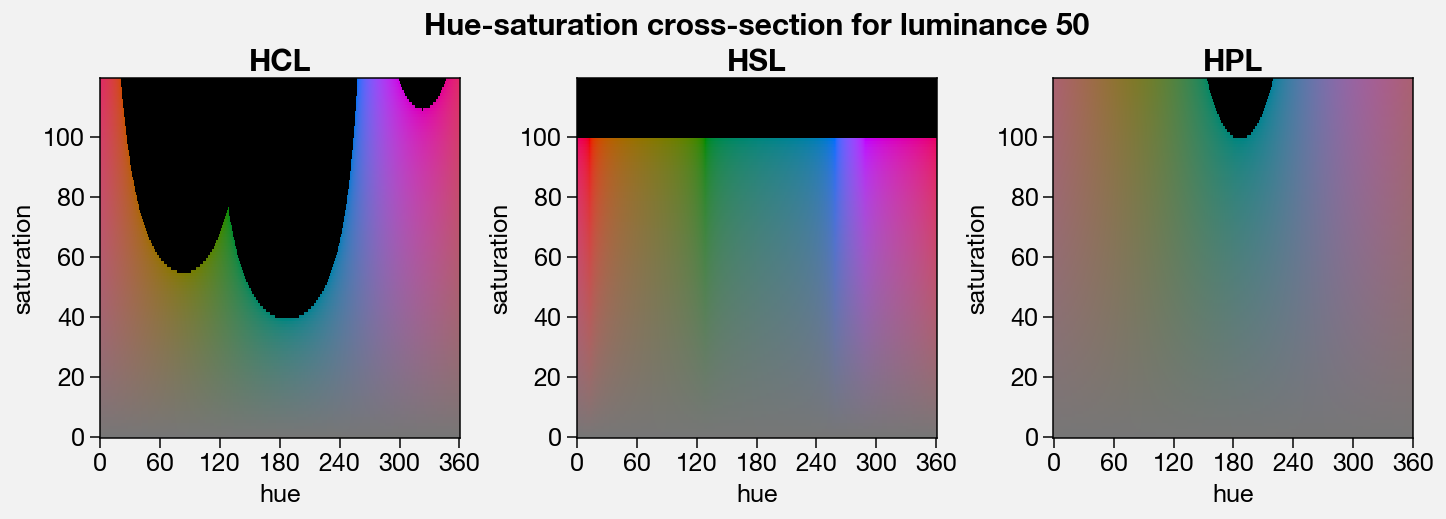

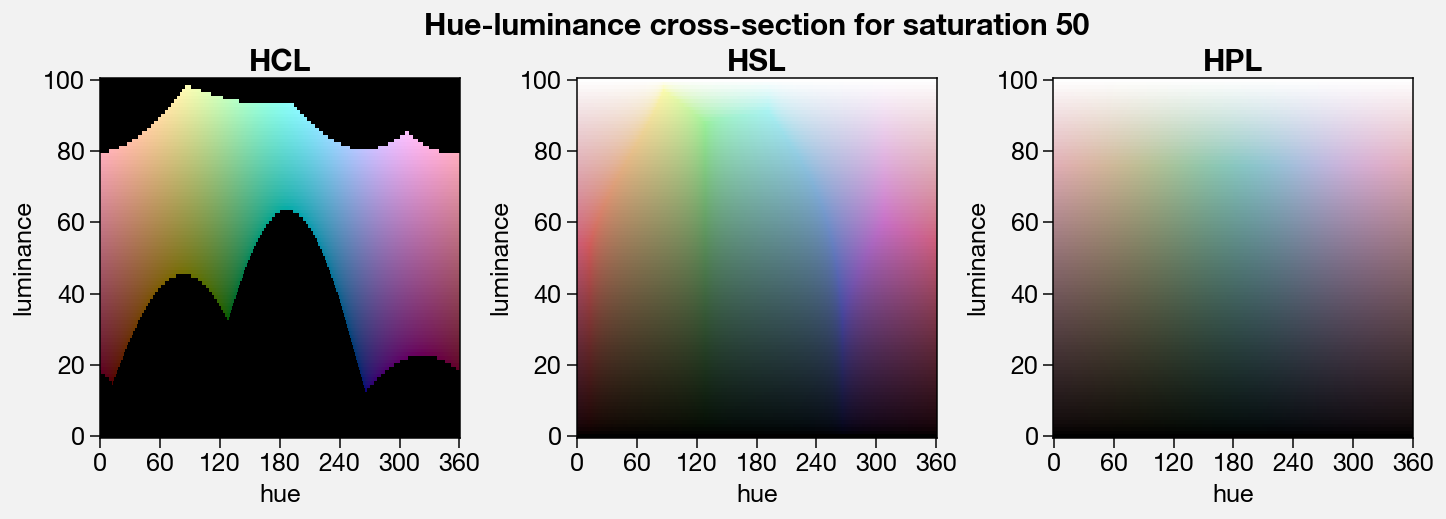

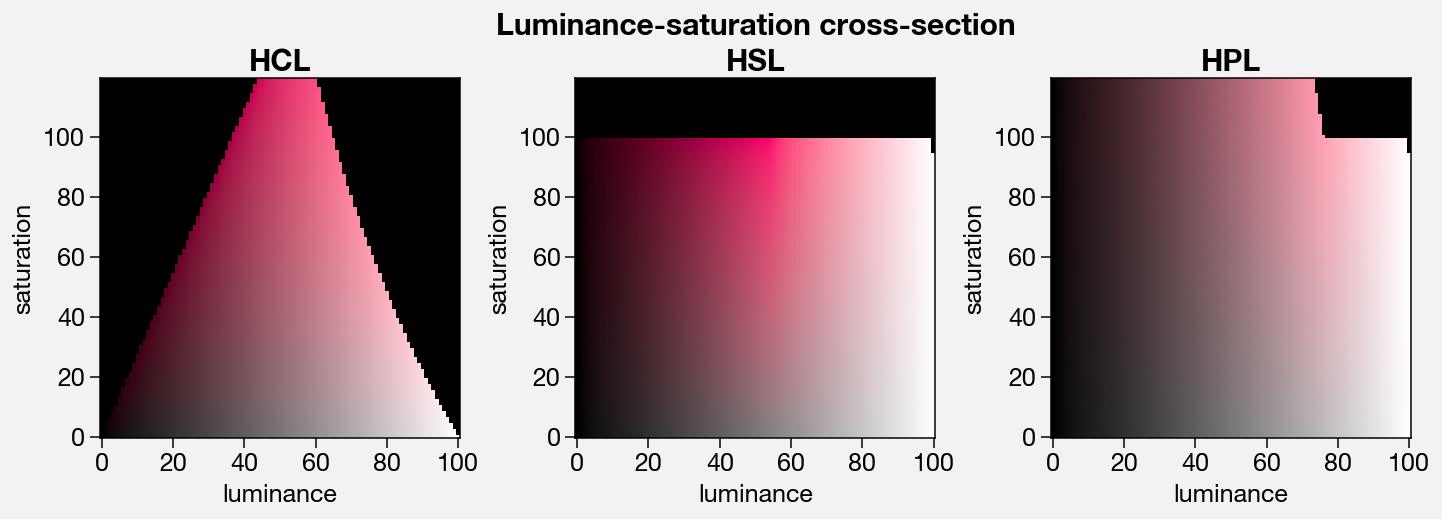

In [4]:
import proplot as plot
f = plot.show_colorspaces(luminance=50)
f = plot.show_colorspaces(saturation=50)
f = plot.show_colorspaces(hue=0)

# Bad colormaps

To test the extent to which a colormap is "perceptually uniform," we can transform its RGB coordinates to HCL coordinates and plot the hue, chroma, and luminance channels as a function of colormap index. The below colormaps were found in recent publications and older plotting software.

In [2]:
import bad_cmaps
cmaps = bad_cmaps.load_cmaps()

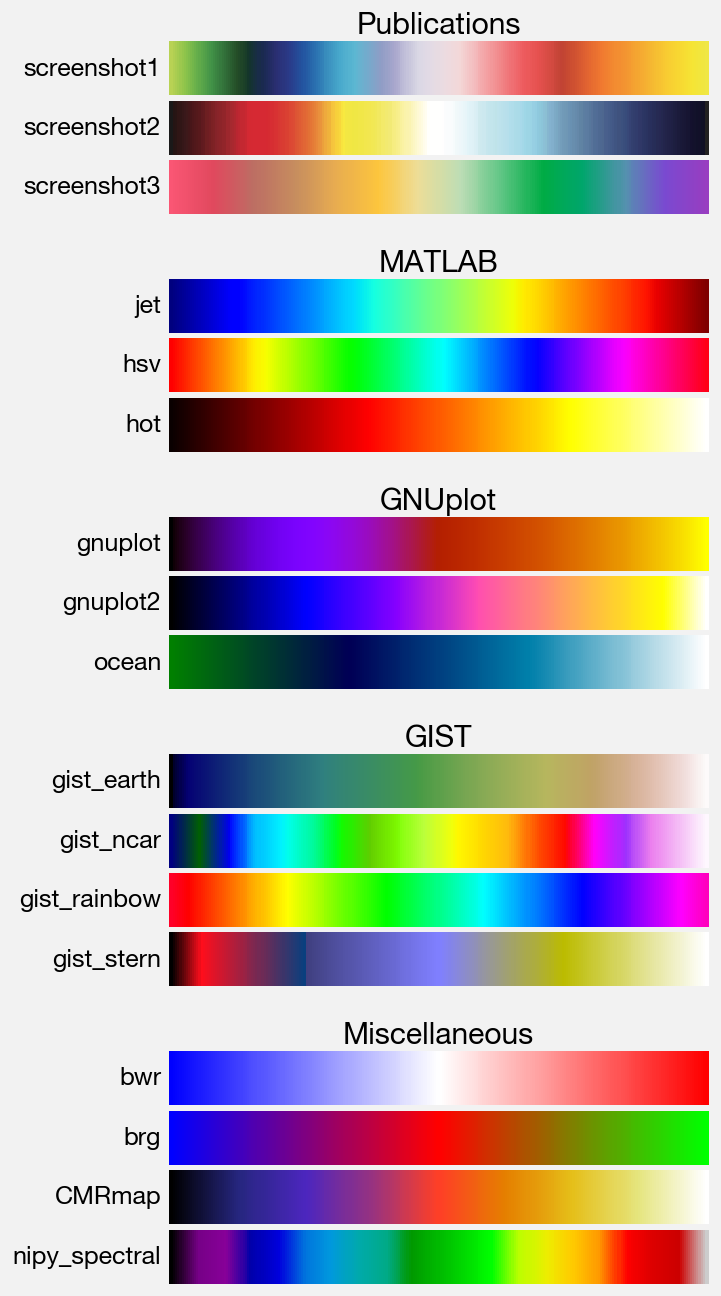

In [3]:
import proplot as plot
f = plot.show_cmaps(*cmaps, length=3, width=0.3, unknown='Publications')

First the rainbow colormaps. They use simple linear transformations in RGB space, but they're a hot mess when you examine the HCL channels.

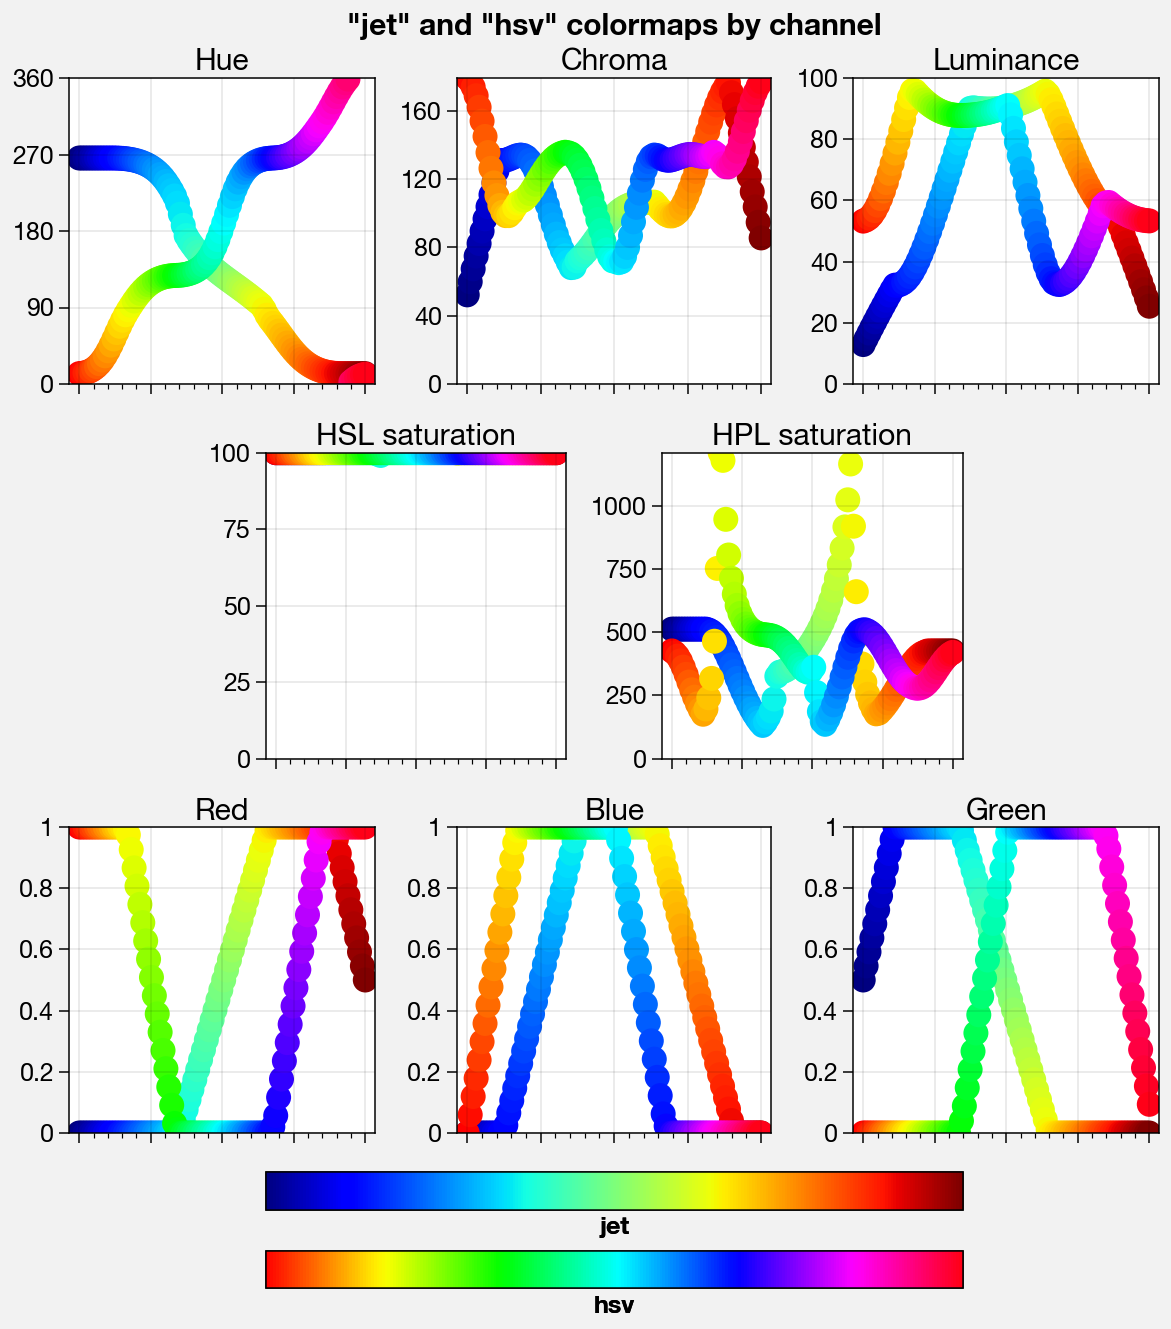

In [7]:
import proplot as plot
f = plot.show_channels('jet', 'hsv')

These maps are nicer, but once again, using linear transformations in RGB space causes problems. Even the popular "bwr" colormap has *flat* luminance and chroma on either end of the scale, making it hard to see transitions in this region.

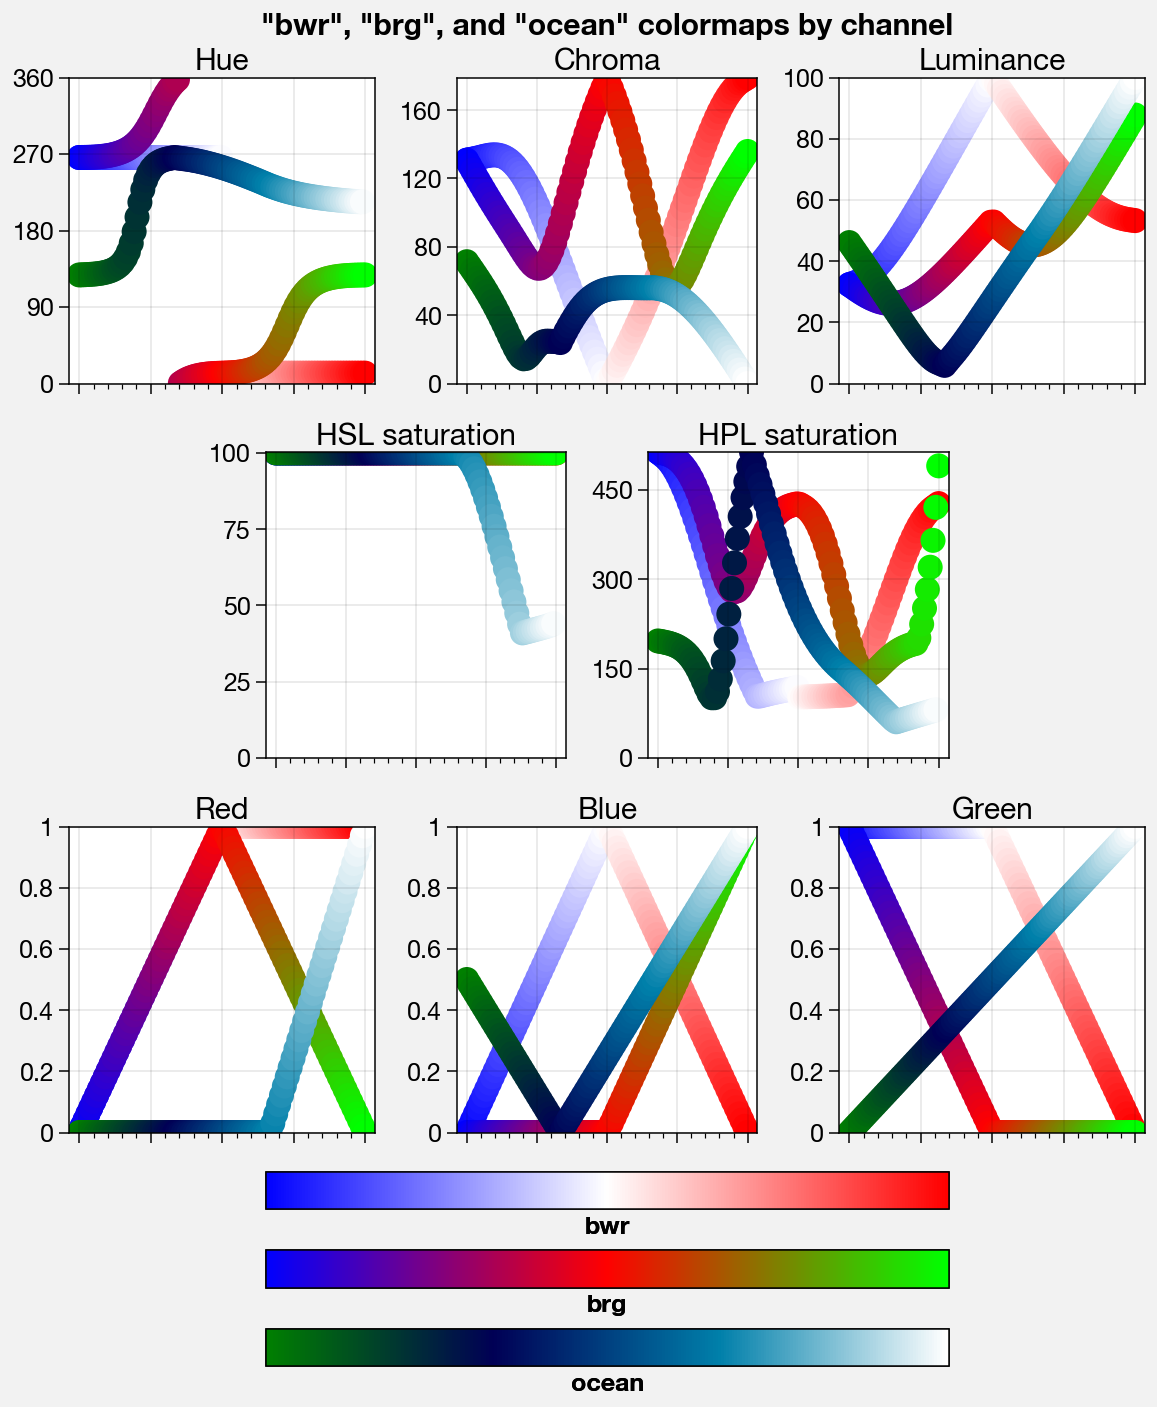

In [8]:
import proplot as plot
f = plot.show_channels('bwr', 'brg', 'ocean')

These "hot" colormaps had promise, but because the transformations were implemented in RGB space, we get weird cliffs and thresholds in the hue and luminance channels.

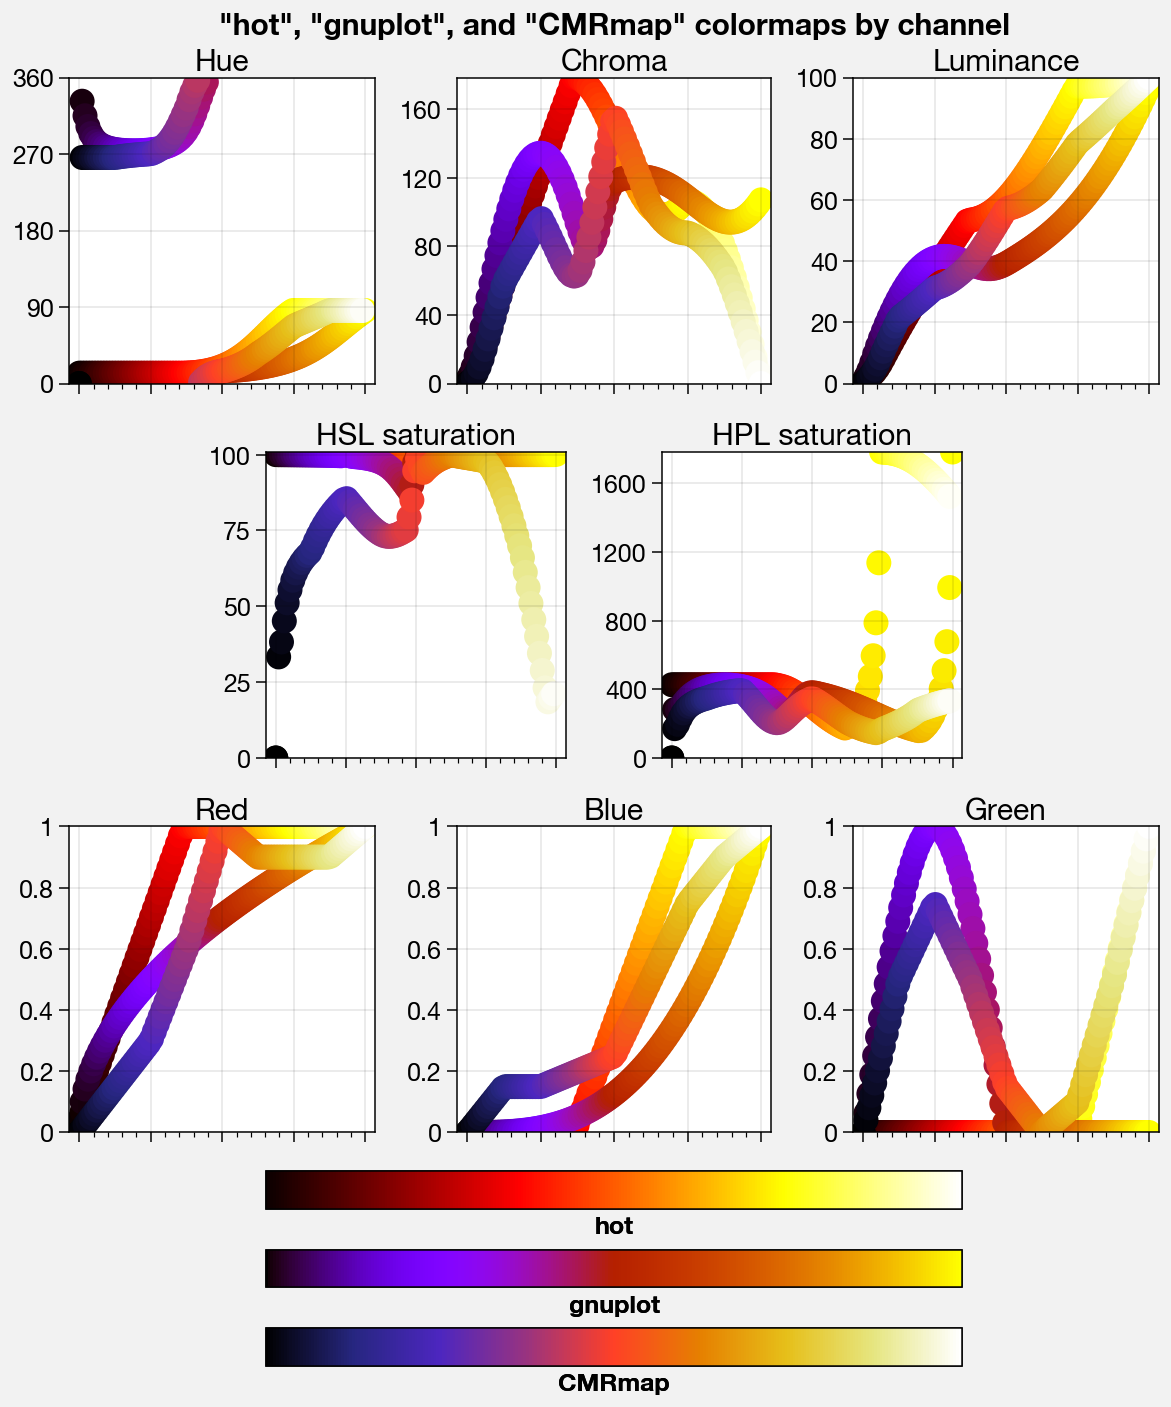

In [9]:
import proplot as plot
f = plot.show_channels('hot', 'gnuplot', 'CMRmap')

These colormaps were taken from various publications. We're not sure how they were designed, because the transitions in RGB *and* HCL space are very eratic. Suffice it to say, they are not "perceptually uniform".

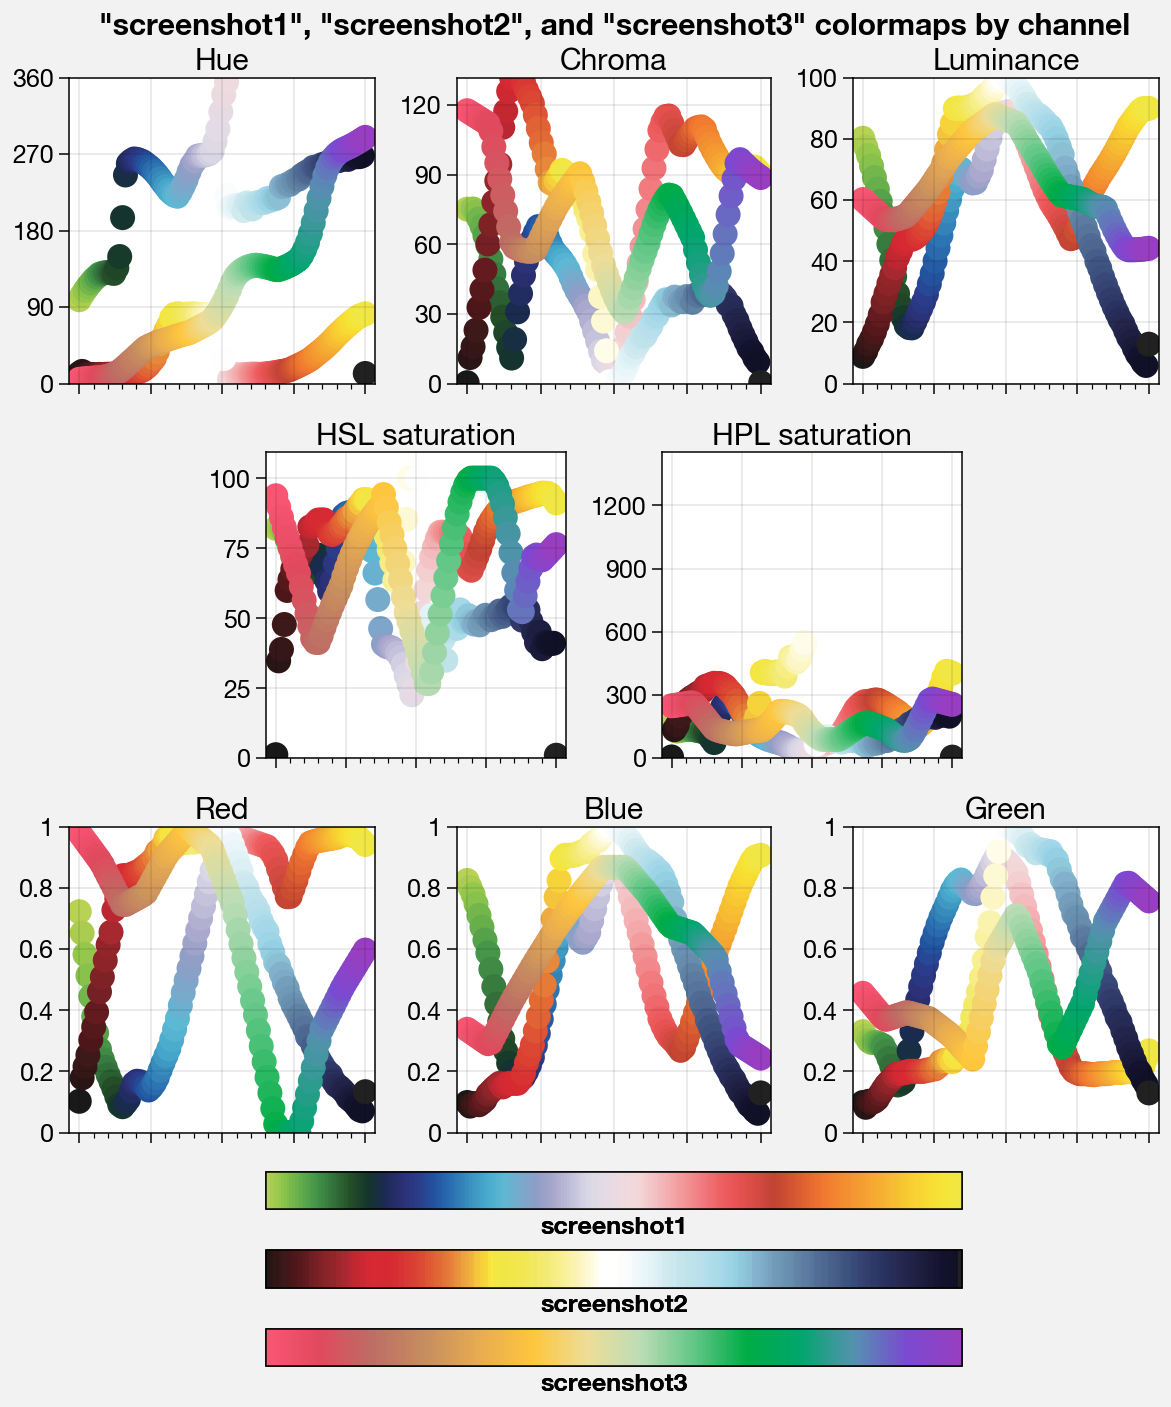

In [11]:
import proplot as plot
f = plot.show_channels('screenshot1', 'screenshot2', 'screenshot3', rgb=True)

# Good colormaps

Next we see how "good" colormaps look in HCL coordinates. These are from the matplotlib, seaborn, ProPlot, cmOcean, and ColorBrewer. They tend to have erratic variations in RGB coordinates, but linear transitions in luminance and hue smooth transitions in chroma. Remember it is difficult to have perfectly linear transitions in chroma due to the "impossible colors" problem.

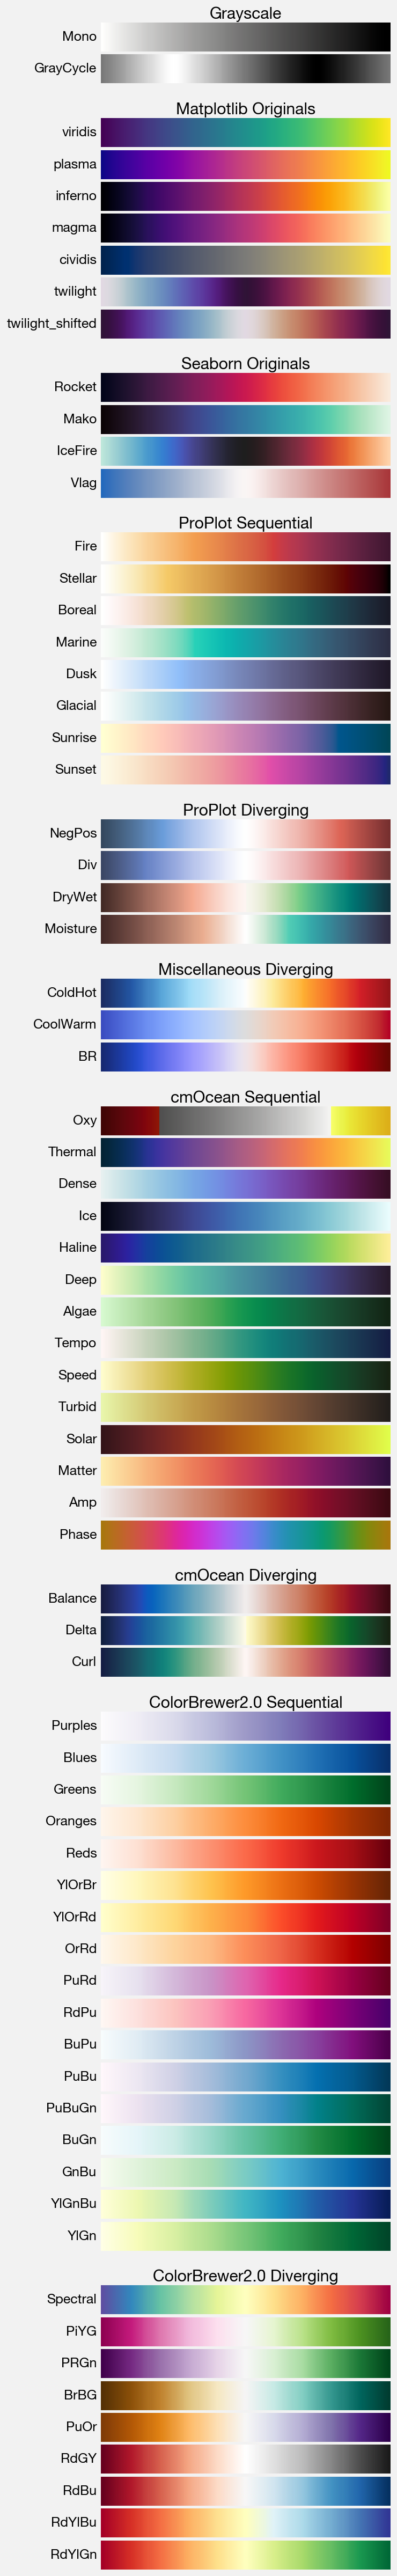

In [12]:
import re
import proplot as plot
cmaps = [cmap for cmap in plot.cmaps if not re.match('^.*[0-9]$', cmap)]
f = plot.show_cmaps(*cmaps, length=3, width=0.3)

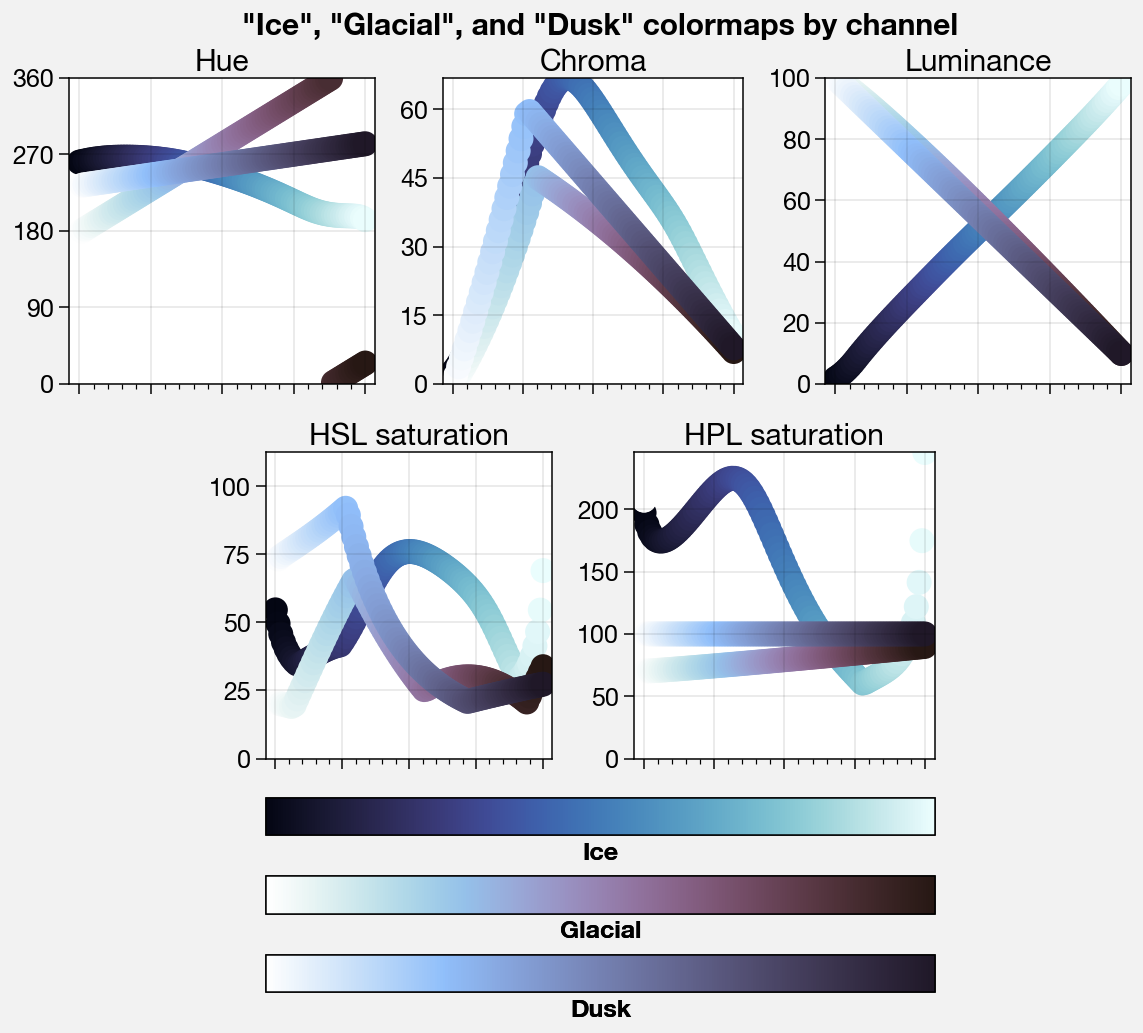

In [13]:
import proplot as plot
f = plot.show_channels('ice','glacial','dusk', rgb=False)

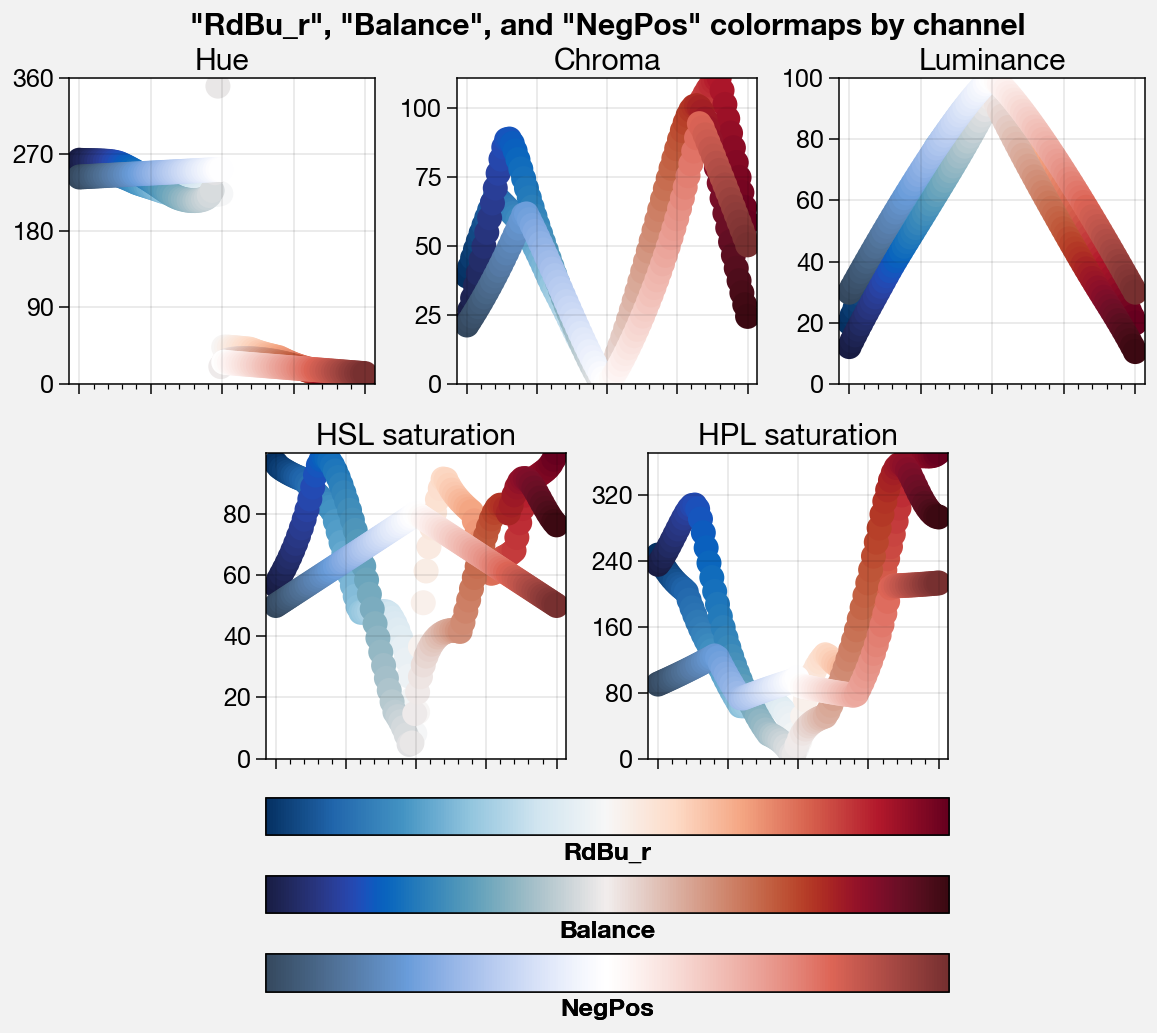

In [14]:
import proplot as plot
f = plot.show_channels('BuRd','Balance','NegPos', rgb=False)

These colormaps were painstakingly designed by the matplotlib developers. They have roughly linear transitions in hue and luminance, with smooth oscillating transitions in chroma.

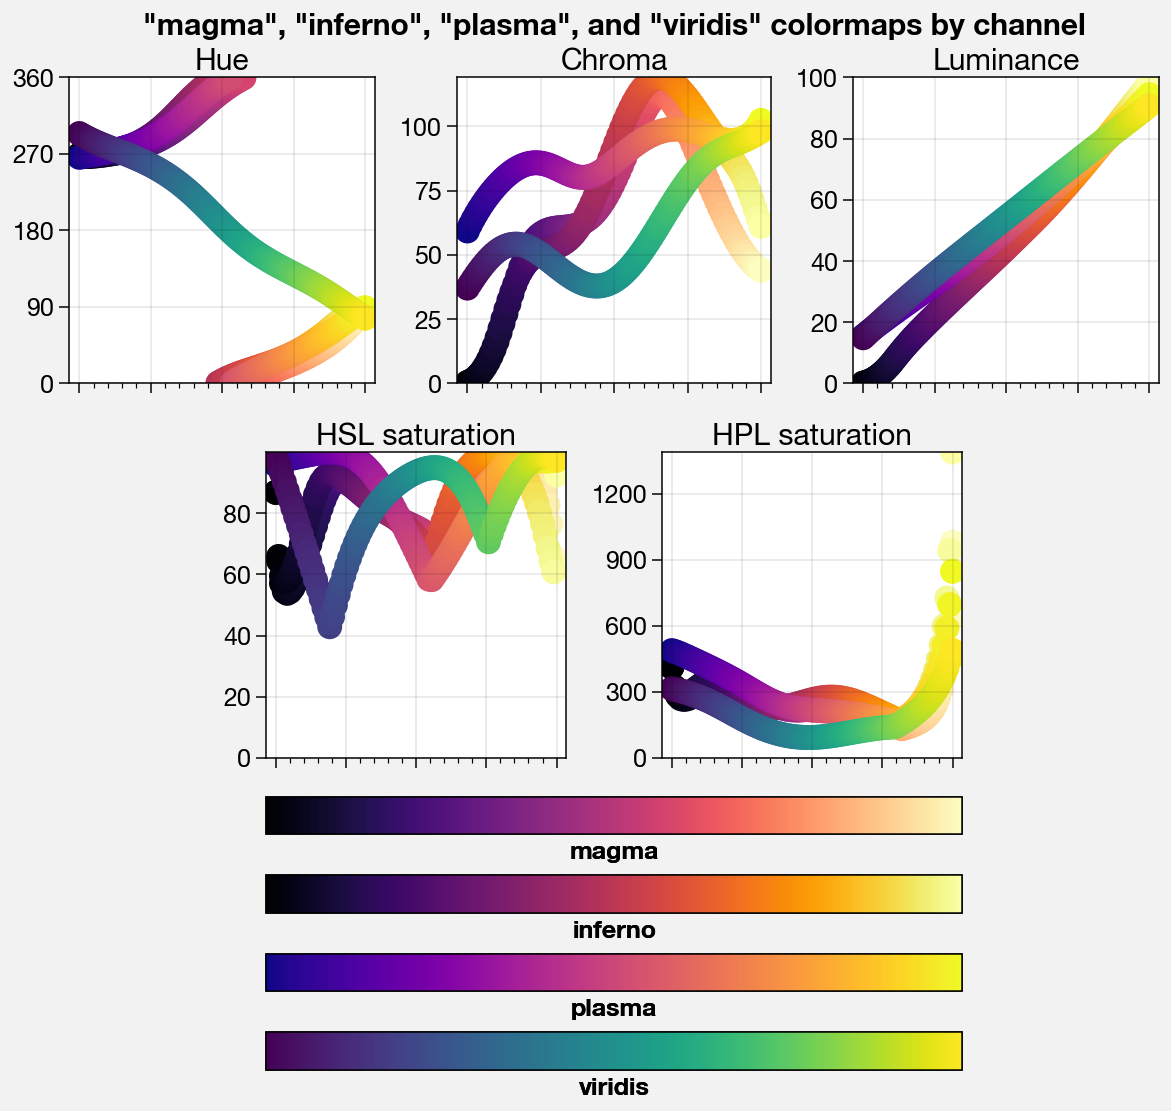

In [15]:
f = plot.show_channels('magma', 'inferno', 'plasma', 'viridis', rgb=False)

These "cyclic" colormaps wrap around to the same color on either end. They have smooth transitions, with two sharp transitions at the inflection points. The Phase colormap is a bit more eratic than the twilight colormap.

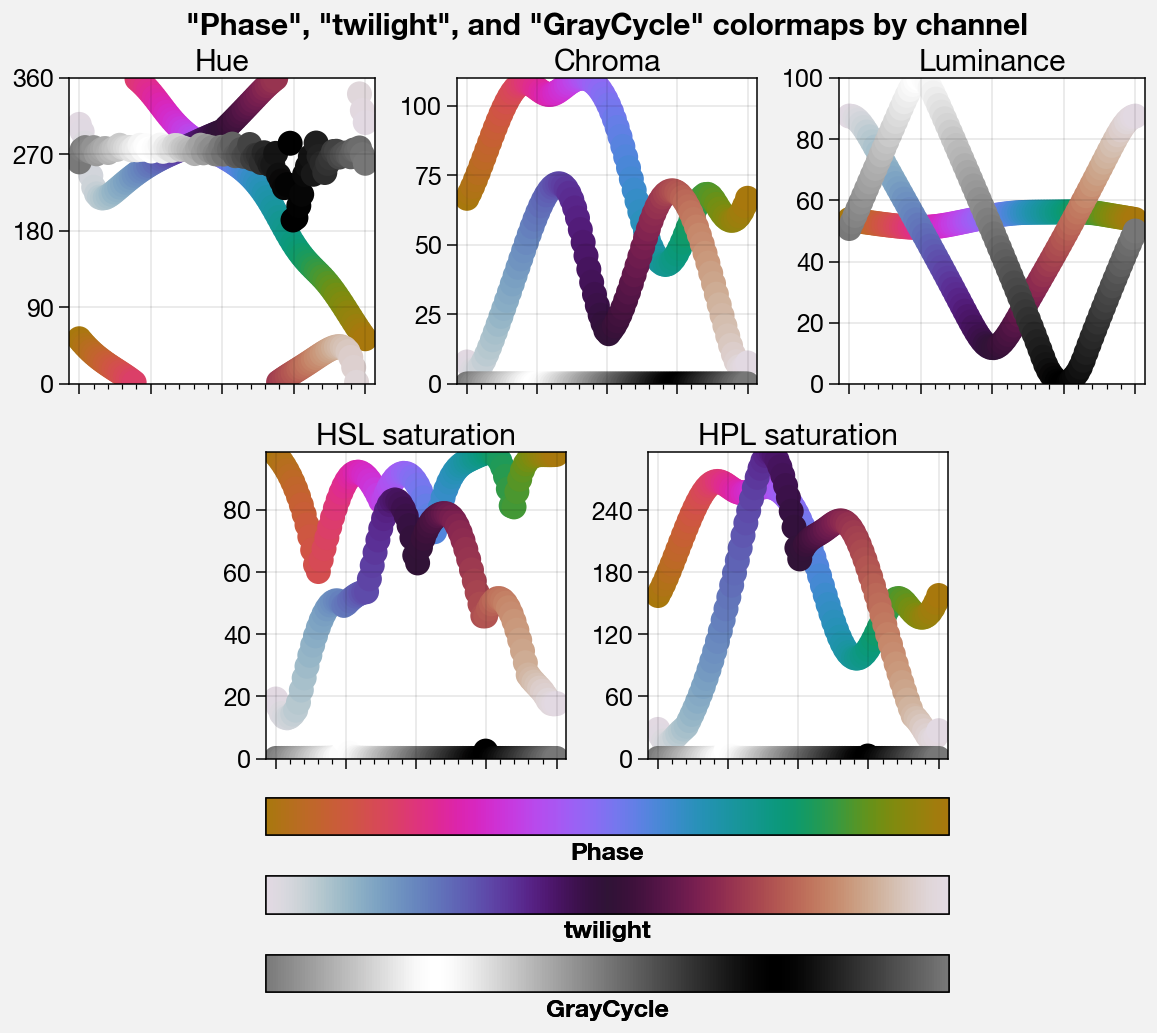

In [16]:
import proplot as plot
f = plot.show_channels('phase', 'twilight', 'graycycle', rgb=False)

These classic ColorBrewer colormaps were some of the first designed with color theory in mind, and tend to have smoothly varying, somewhat non-linear transitions in all channels.

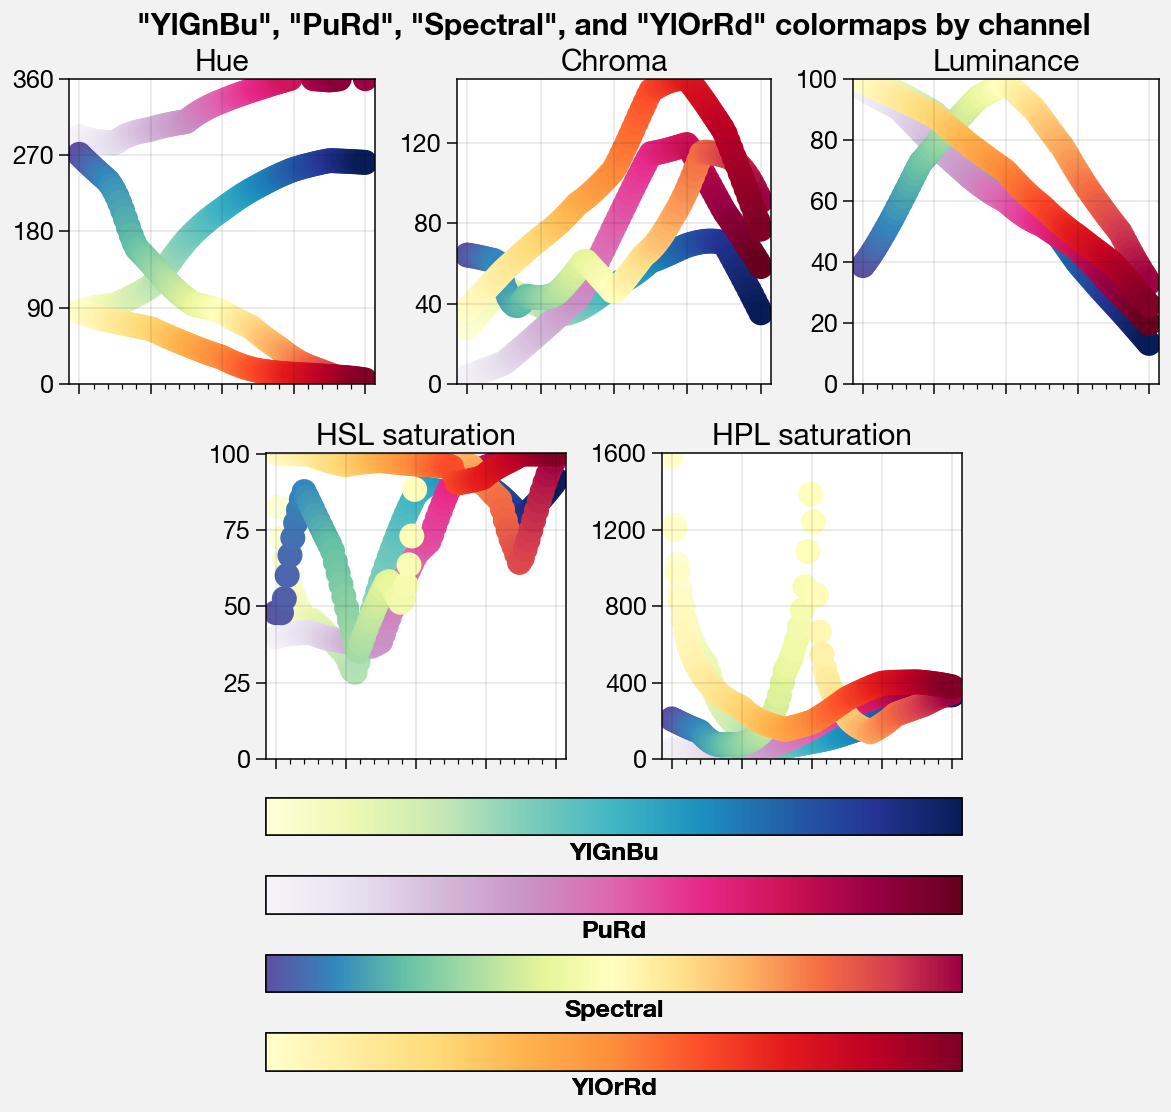

In [17]:
import proplot as plot
f = plot.show_channels('YlGnBu', 'PuRd', 'Spectral', 'YlOrRd', rgb=False)